In [1]:
from sklearn.preprocessing import normalize, robust_scale, minmax_scale
from planet4.dbscan import DBScanner
from planet4 import io
from sklearn.metrics import pairwise

In [2]:
db = io.DBManager()

In [44]:
obsids = db.image_ids

In [45]:
data = db.get_image_name_markings(obsids[0])

In [46]:
%matplotlib inline

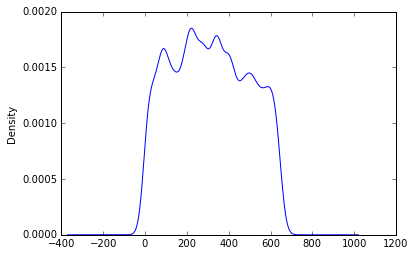

In [52]:
data.y.plot.kde()

In [56]:
xycoords = {'x':[11, 12, 30],
            'y':[111, 112, 140],
            'z':[330, 333, 336],
           }
df = pd.DataFrame(xycoords)
df

,x,y,z
0,11,111,330
1,12,112,333
2,30,140,336


In [63]:
minmax_scale?

In [57]:
euclidean_distances(df)

array([[  0.        ,   3.31662479,  35.18522417],
       [  3.31662479,   0.        ,  33.42154993],
       [ 35.18522417,  33.42154993,   0.        ]])

In [58]:
euclidean_distances(normalize(df, axis=0))

array([[ 0.        ,  0.03013157,  0.57349212],
       [ 0.03013157,  0.        ,  0.54384785],
       [ 0.57349212,  0.54384785,  0.        ]])

In [59]:
euclidean_distances(normalize(df, axis=1))

array([[ 0.        ,  0.0025593 ,  0.08653217],
       [ 0.0025593 ,  0.        ,  0.08507791],
       [ 0.08653217,  0.08507791,  0.        ]])

In [39]:
normalize?

In [15]:
dbscanner = DBScanner(df.values, eps=10, min_samples=2)

In [16]:
dbscanner.core_samples

array([0, 1])

In [8]:
%matplotlib inline

In [47]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler, scale


##############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=90, centers=centers, cluster_std=0.4,
                            random_state=0)

##############################################################################

In [48]:
angles, _ = make_blobs(n_features=1, n_samples=90, centers=[[0.2], [0.7]], cluster_std=0.05,
                       random_state=0)

In [49]:
X = np.concatenate([X, angles], axis=1)

In [50]:
X = StandardScaler().fit_transform(X)

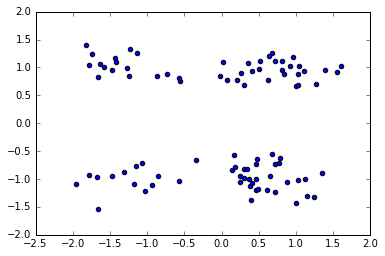

In [51]:
plt.scatter(X[:,0], X[:, 2])

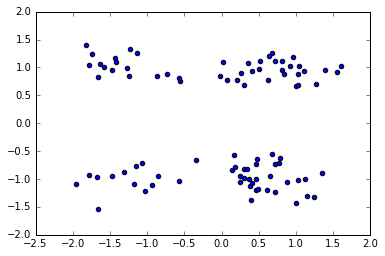

In [52]:
plt.scatter(X[:,0], X[:, 2])

In [53]:
X.shape

(90, 3)

In [54]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

##############################################################################

Estimated number of clusters: 0


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

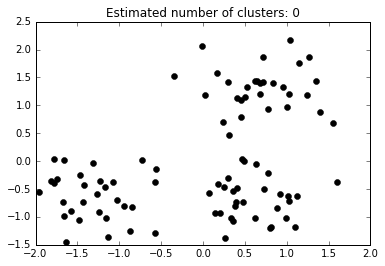

In [55]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)

In [15]:
xy.shape

(159, 3)

In [16]:
x = xy[:, 0]
y = xy[:, 1]
z = xy[:, 2]

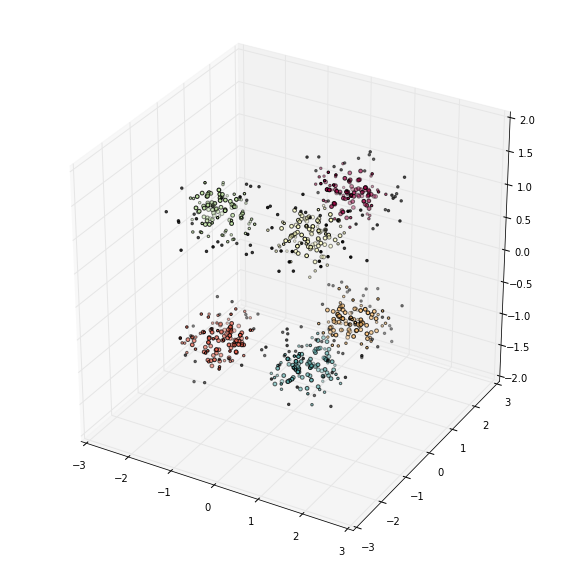

In [24]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    ax.scatter(xy[:, 0], xy[:, 1], xy[:, 2], marker='o', c=col,
               s=14)

    xy = X[class_member_mask & ~core_samples_mask]
    ax.scatter(xy[:, 0], xy[:, 1], xy[:, 2], marker='o', c=col,
               s=6)



In [25]:
import hdbscan

In [26]:
clusterer = hdbscan.HDBSCAN()

In [27]:
X.shape

(750, 3)

In [40]:
db = clusterer.fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.probabilities_ > 0.8] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


Estimated number of clusters: 6
Silhouette Coefficient: 0.545


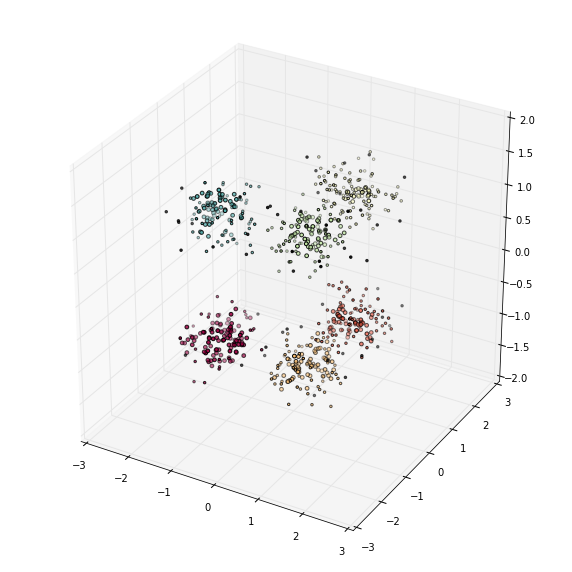

In [41]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    ax.scatter(xy[:, 0], xy[:, 1], xy[:, 2], marker='o', c=col,
               s=14)

    xy = X[class_member_mask & ~core_samples_mask]
    ax.scatter(xy[:, 0], xy[:, 1], xy[:, 2], marker='o', c=col,
               s=6)

